In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
data = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/five_minute.csv", parse_dates=["time"], index_col="time")

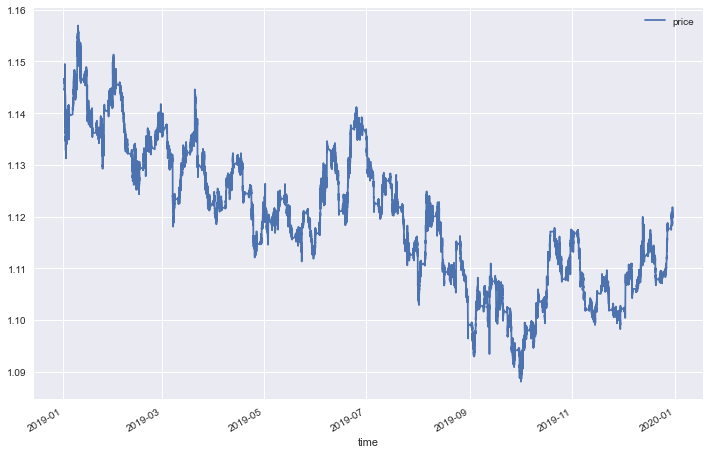

In [5]:
data.plot(figsize=(12,8))
plt.show()

In [6]:
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [8]:
data["returns"] = np.log(data.div(data.shift(1)))

In [11]:
# Creating the first lag of data
data["lag1"] = data["returns"].shift(1)

In [13]:
data.dropna(inplace=True)

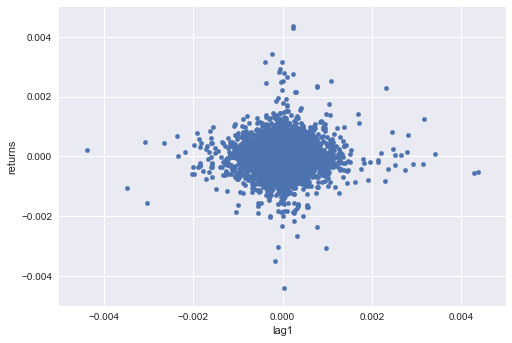

In [16]:
data.iloc[:, -2:].plot(kind="scatter", x="lag1", y="returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression(fit_intercept=True)

In [39]:
lm.fit(np.array(data["lag1"]).reshape((-1,1)), data["returns"])

LinearRegression()

In [41]:
slope = lm.coef_
slope

array([-0.03350837])

In [42]:
intercept = lm.intercept_
intercept

-3.244247144502304e-07

In [43]:
data["pred"] = lm.predict(np.array(data["lag1"]).reshape((-1,1)))

In [44]:
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,3.414522e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.748582e-07
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.221814e-06


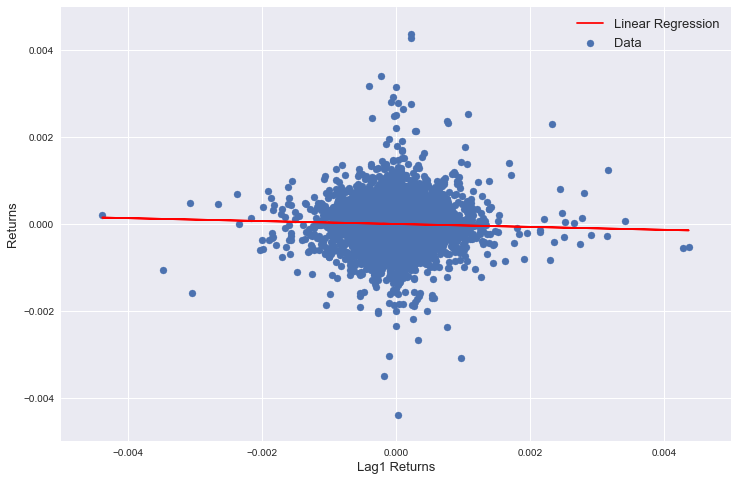

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(x=data["lag1"], y=data["returns"], label="Data")
plt.plot(data["lag1"], data["pred"], c="red", label="Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize=13)
plt.xlabel("Lag1 Returns", fontsize=13)
plt.ylabel("Returns", fontsize=13)
plt.show()

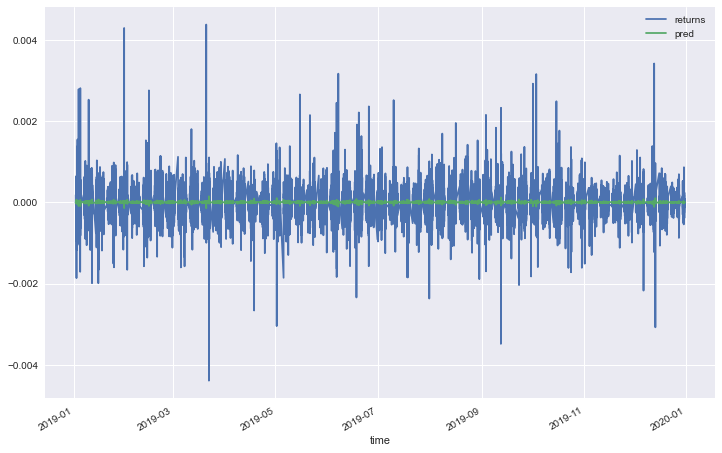

In [52]:
data[["returns", "pred"]].plot(figsize=(12,8))
plt.show()

In [54]:
data["pred"] = np.sign(data["pred"])

In [55]:
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.0
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.0


In [63]:
hits = np.sign(data["returns"] * data["pred"]).value_counts()

In [64]:
hits

 1.0    37456
-1.0    34315
 0.0     1947
dtype: int64

In [66]:
hit_ratio = [hits[1.0]/ sum(hits)]

In [67]:
hit_ratio

[0.5080984291489189]